Abrimo el archivo

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew
import math
from scipy.stats import levene
import researchpy as rp
from sklearn.preprocessing import StandardScaler
import itertools
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,8)



In [30]:
df = pd.read_pickle('../datos/bikes_sin_outliers.pk')

In [26]:
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,2018-01-01,invierno,0.0,1.0,festivo,1.0,laborable,2.0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,2.0,2018-01-02,invierno,0.0,1.0,no festivo,2.0,laborable,2.0,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0


In [27]:
df_r = df.drop(["casual","instant", "cnt"], axis=1)

In [28]:
df_r.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered
0,2018-01-01,invierno,0.0,1.0,festivo,1.0,laborable,2.0,14.110847,18.18125,80.5833,10.749882,654.0
1,2018-01-02,invierno,0.0,1.0,no festivo,2.0,laborable,2.0,14.902598,17.68695,69.6087,16.652113,670.0
2,2018-01-03,invierno,0.0,1.0,no festivo,3.0,laborable,1.0,8.050924,9.47025,43.7273,16.636703,1229.0
3,2018-01-04,invierno,0.0,1.0,no festivo,4.0,laborable,1.0,8.200000,10.60610,59.0435,10.739832,1454.0
4,2018-01-05,invierno,0.0,1.0,no festivo,5.0,laborable,1.0,9.305237,11.46350,43.6957,12.522300,1518.0


### Test de normalidad Variable Respuesta (ASUNCIÓN DE NORMALIDAD)

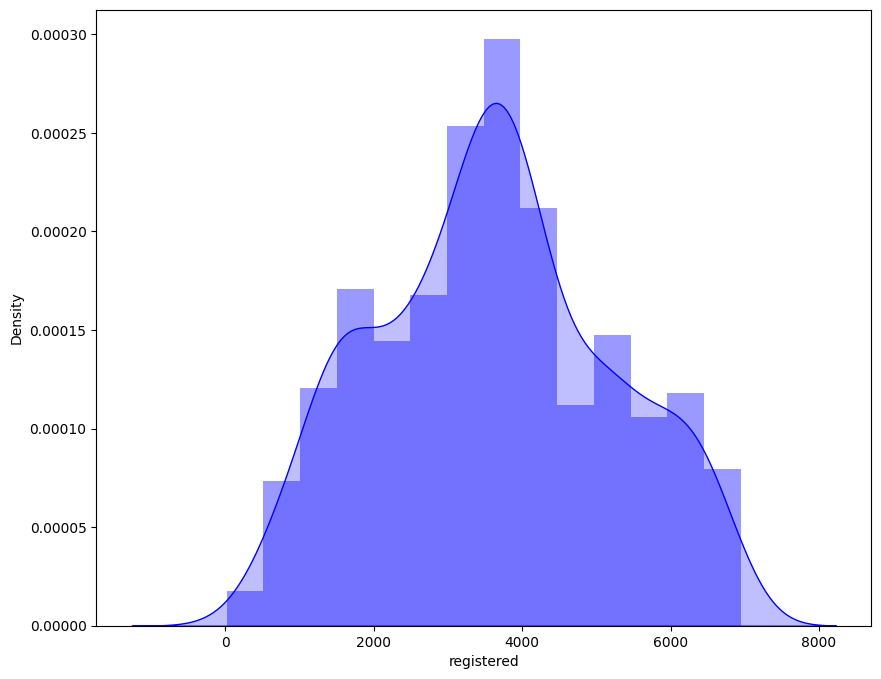

In [29]:
sns.distplot(
    df["registered"], 
    #hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

In [33]:
stats.shapiro(df_r["registered"])

ShapiroResult(statistic=nan, pvalue=1.0)

Viendo el resultado que nos da el test Shapiro en nuestra variable respuesta, vemos que el valor que presenta es mayor que 0.05, por tanto no puede rechazar la hipotesis nula, es decir, nuestros datos son NORMALES!

### ASUNCIÓN DE INDEPENDENCIA

In [40]:
df_r_numericas = df_r.select_dtypes(include=np.number)

In [47]:
df_r_continuas = pd.DataFrame(df_r[["temp", "atemp", "hum", "windspeed"]])

In [48]:
df_r_continuas.head()

,temp,atemp,hum,windspeed
0,14.110847,18.18125,80.5833,10.749882
1,14.902598,17.68695,69.6087,16.652113
2,8.050924,9.47025,43.7273,16.636703
3,8.200000,10.60610,59.0435,10.739832
4,9.305237,11.46350,43.6957,12.522300


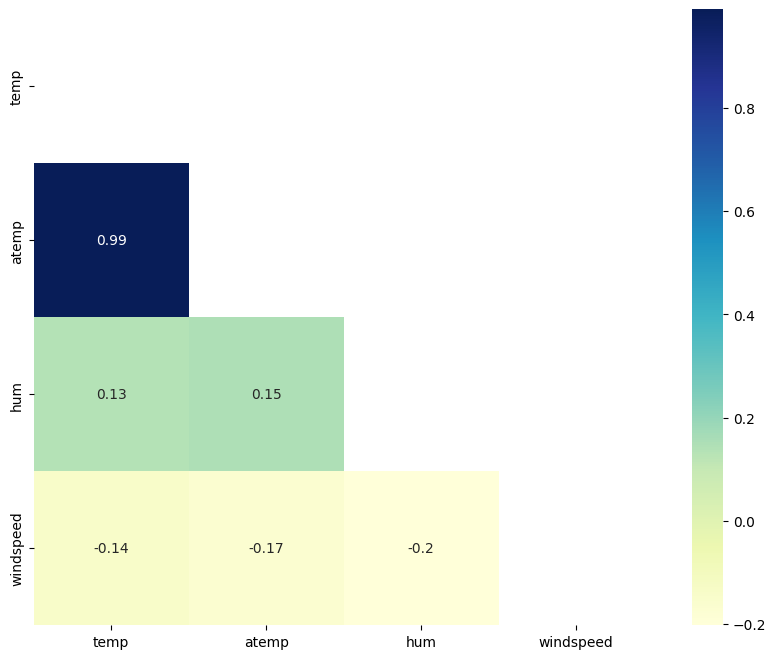

In [49]:
mask = np.triu(np.ones_like(df_r_continuas.corr(), dtype=np.bool))

sns.heatmap(df_r_continuas.corr(), # calculamos la correlación. En este caso, como no estamos especificando nada la correlación será la de Pearson.
            cmap = "YlGnBu", # para especoficar el color del mapa
           annot = True, 
           mask = mask); # para sacar el valor de la correlación

In [35]:
predictoras = df_r.columns.drop("registered")
predictoras

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [37]:
df_r.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered
0,2018-01-01,invierno,0.0,1.0,festivo,1.0,laborable,2.0,14.110847,18.18125,80.5833,10.749882,654.0
1,2018-01-02,invierno,0.0,1.0,no festivo,2.0,laborable,2.0,14.902598,17.68695,69.6087,16.652113,670.0
2,2018-01-03,invierno,0.0,1.0,no festivo,3.0,laborable,1.0,8.050924,9.47025,43.7273,16.636703,1229.0
3,2018-01-04,invierno,0.0,1.0,no festivo,4.0,laborable,1.0,8.200000,10.60610,59.0435,10.739832,1454.0
4,2018-01-05,invierno,0.0,1.0,no festivo,5.0,laborable,1.0,9.305237,11.46350,43.6957,12.522300,1518.0


In [39]:
from itertools import combinations
 
 
# size of combination is set to 3
combinaciones = list(combinations(predictoras, 2))
print(combinaciones)


for i in combinaciones:
    crosstab, test_results, expected = rp.crosstab(df_r[i[0]], df_r[i[1]],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
    print(f"INDEPENDENCIA ENTRE {i[0], i[1]} \n", test_results)
    print("........................")

[('dteday', 'season'), ('dteday', 'yr'), ('dteday', 'mnth'), ('dteday', 'holiday'), ('dteday', 'weekday'), ('dteday', 'workingday'), ('dteday', 'weathersit'), ('dteday', 'temp'), ('dteday', 'atemp'), ('dteday', 'hum'), ('dteday', 'windspeed'), ('season', 'yr'), ('season', 'mnth'), ('season', 'holiday'), ('season', 'weekday'), ('season', 'workingday'), ('season', 'weathersit'), ('season', 'temp'), ('season', 'atemp'), ('season', 'hum'), ('season', 'windspeed'), ('yr', 'mnth'), ('yr', 'holiday'), ('yr', 'weekday'), ('yr', 'workingday'), ('yr', 'weathersit'), ('yr', 'temp'), ('yr', 'atemp'), ('yr', 'hum'), ('yr', 'windspeed'), ('mnth', 'holiday'), ('mnth', 'weekday'), ('mnth', 'workingday'), ('mnth', 'weathersit'), ('mnth', 'temp'), ('mnth', 'atemp'), ('mnth', 'hum'), ('mnth', 'windspeed'), ('holiday', 'weekday'), ('holiday', 'workingday'), ('holiday', 'weathersit'), ('holiday', 'temp'), ('holiday', 'atemp'), ('holiday', 'hum'), ('holiday', 'windspeed'), ('weekday', 'workingday'), ('weekd

Hemos decidido eliminar las columnas "temp" y "weathersit" ya que son numéricas y están muy correlacionadas con respecto a otras variables. Con respecto a las variables categóricas:

season - mnth = dependiente

season - holiday = dependiente

holiday - weekday = dependiente

weekday - workingday = dependiente


Como todavía no tenemos muy claro si nos harán falta para el análisis hemos decidido seguir el estudio con ellas. En el caso que las predicciones no sean satisfactorias ya tenemos "candidatas" para cambiar nuestro estudio y volver a realizar la predicción.



ASUNCIÓN DE HOMOCEDASTICIDAD

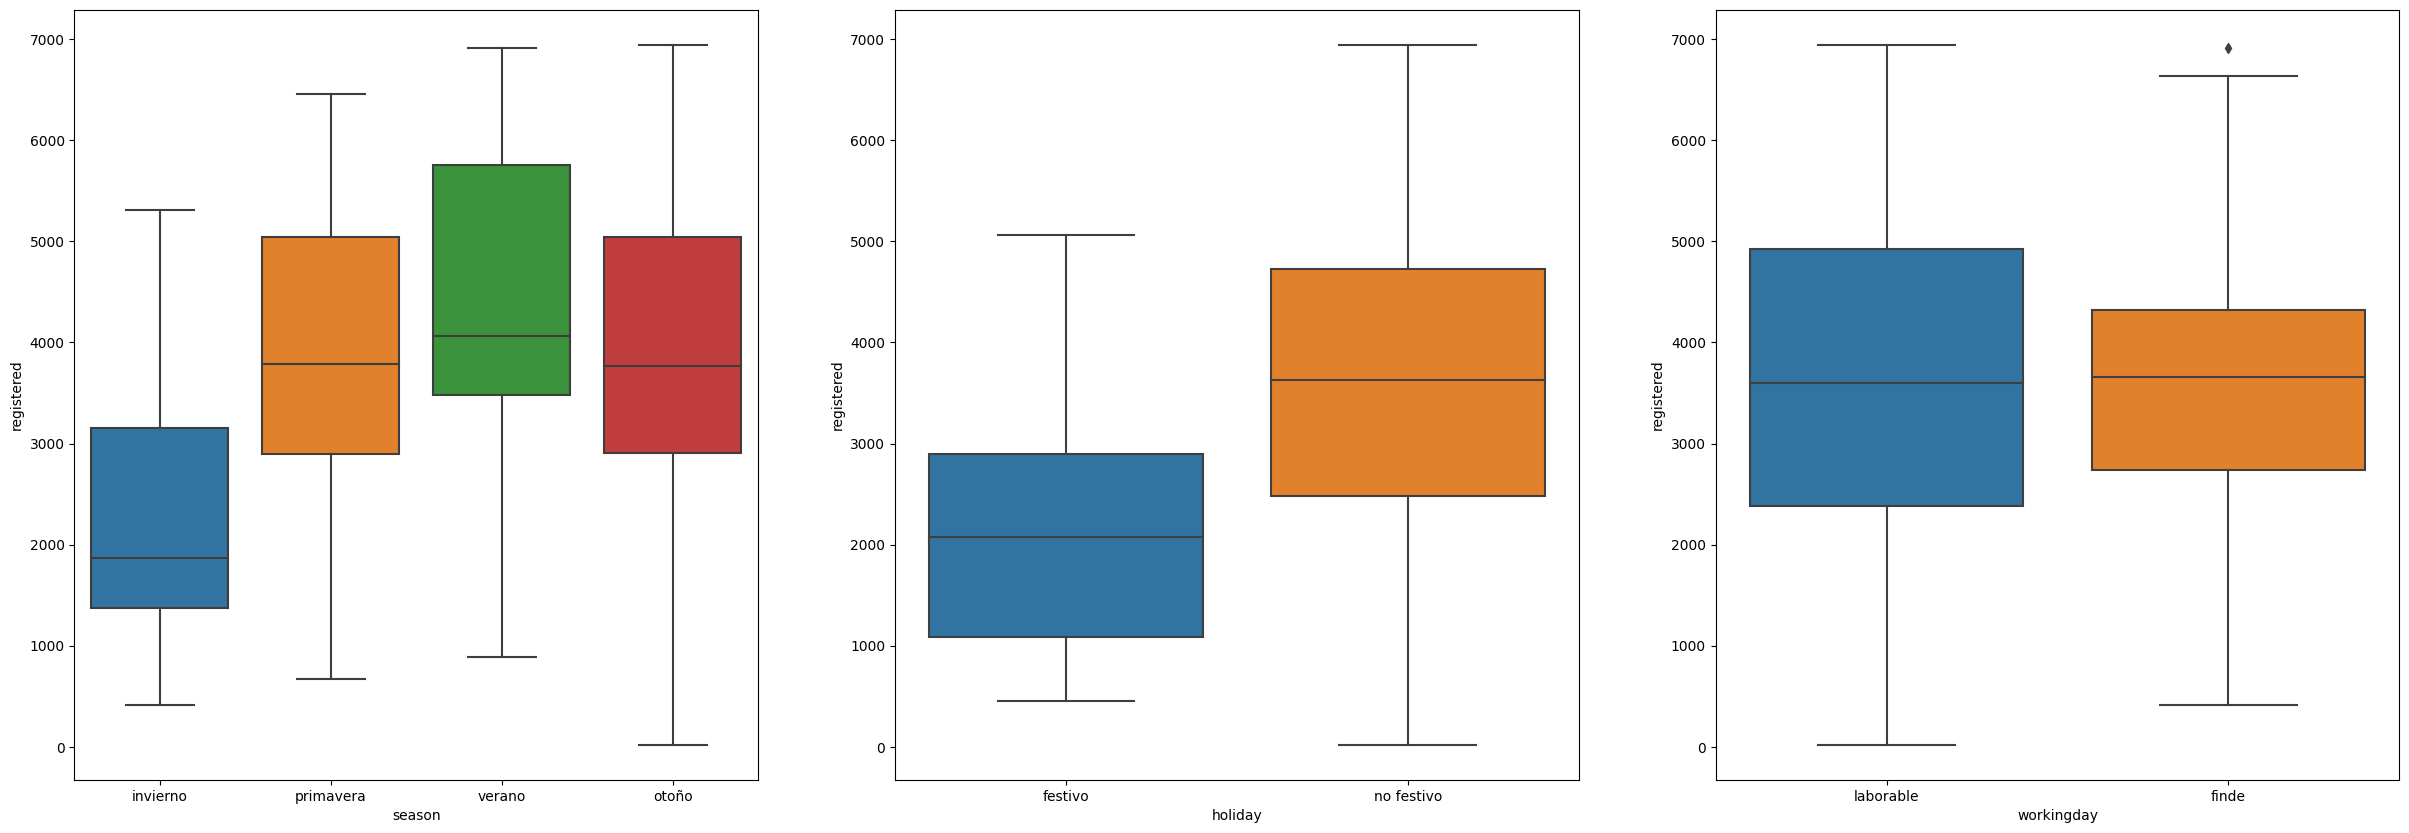

In [55]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

axes = axes.flat

columnas_cat = df_r.select_dtypes(include = ["object"]).columns

for i, colum in enumerate(columnas_cat):
    sns.boxplot(
    x       = colum,
    y       = 'registered',
    data    = df_r,
    palette = 'tab10',
    ax      = axes[i]
    )


In [65]:
def datos_test_levene(columna, df):
    valores = df[columna].unique()
    d = {}
    for x in valores:
        d["{0}".format(x)] = df[df[columna] == x]["registered"]
    return d
season = datos_test_levene("season", df_r)
holiday = datos_test_levene("holiday", df_r)
workingday = datos_test_levene("workingday", df_r)


In [67]:
levene_season = stats.levene(season['invierno'], season['primavera'],season['verano'],season['otoño'], center='median')
levene_season

LeveneResult(statistic=1.872364722103345, pvalue=0.13288261991463465)

In [70]:
levene_holiday = stats.levene(holiday['festivo'], holiday['no festivo'], center='median')
levene_holiday

LeveneResult(statistic=0.2205600417912167, pvalue=0.6387632031751871)

In [73]:
levene_workingday = stats.levene(workingday['laborable'], workingday['finde'], center='median')
levene_workingday

LeveneResult(statistic=12.5266189669251, pvalue=0.0004283604224028704)

Observando la homocedasticidad de nuestras variables predictoras vemos que las variables "season" y "holiday" presentan homocedasticidad en sus datos. En el caso de la variable "workingday" presenta heterocedasticidad.

Working day a raíz de habernos salido heterocedasticidad podemos ver que está muy relacionada con las variables holiday y weekday, ya que los valores que nos da este variable podemos encontrarlos en las otras variables (pensamiento de eliminación de esta variable)

In [74]:
# creamos un diccionario para almacenar los resultados de los test
resultados = {}

# seleccionamos solo las columnas numéricas y eliminamos la columna de precio
numericas_col = df_r.select_dtypes(include = np.number).drop("registered", axis = 1).columns

#iteremos por la lista de las columnas numéricas
for col in numericas_col:
    # calculamos el p-valor de test
    statistic, p_val = levene(df_r[col], df_r.registered, center='median')
    # lo almacenamos en el charges
    resultados[col] = p_val


Mañana resolvemos este código

---